In [8]:
import sys
import gc

# Memory allocation example
def demonstrate_memory_management():
    # Objects are allocated in private heap
    my_list = [1, 2, 3, 4, 5]  # Allocated in heap
    
    # Check object reference count
    ref_count = sys.getrefcount(my_list)
    print(f"Reference count: {ref_count}")
    
    # Memory usage
    memory_usage = sys.getsizeof(my_list)
    print(f"Memory usage: {memory_usage} bytes")

demonstrate_memory_management()

Reference count: 2
Memory usage: 104 bytes


In [9]:
import sys
import gc

# Memory allocation example
def demonstrate_memory_management():
    # Objects are allocated in private heap
    my_list = [1, 2, 3, 4,8]  # Allocated in heap
    
    # Check object reference count
    ref_count = sys.getrefcount(my_list)
    print(f"Reference count: {ref_count}")
    
    # Memory usage
    memory_usage = sys.getsizeof(my_list)
    print(f"Memory usage: {memory_usage} bytes")

demonstrate_memory_management()

Reference count: 2
Memory usage: 104 bytes


In [10]:
import sys

def reference_counting_demo():
    # Create object
    data = [1, 2, 3]
    print(f"Initial ref count: {sys.getrefcount(data)}")
    
    # Assign to another variable
    data2 = data
    print(f"After assignment: {sys.getrefcount(data)}")
    
    # Delete reference
    del data2
    print(f"After deletion: {sys.getrefcount(data)}")
reference_counting_demo()

Initial ref count: 2
After assignment: 3
After deletion: 2


In [ ]:
import gc
import weakref

class MLModel:
    def __init__(self, name):
        self.name = name
        self.data = []

def garbage_collection_demo():
    # Create circular reference
    model1 = MLModel("Model1")
    model2 = MLModel("Model2")
    model1.partner = model2
    model2.partner = model1
    
    # Check garbage collection
    print(f"Objects before GC: {len(gc.get_objects())}")
    
    # Force garbage collection
    collected = gc.collect()
    print(f"Objects collected: {collected}")
    
    # Monitor object lifecycle
    def callback(ref):
        print("Object was garbage collected")
    
    weak_ref = weakref.ref(model1, callback)

garbage_collection_demo()

Objects before GC: 81478
Objects collected: 10


In [18]:
pip install memory-profiler


  Using cached memory_profiler-0.61.0-py3-none-any.whl.metadata (20 kB)
Using cached memory_profiler-0.61.0-py3-none-any.whl (31 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:

import numpy as np
import pandas as pd
from memory_profiler import profile

class MemoryEfficientMLWorkflow:
    def __init__(self):
        self.data = None
        self.model = None
    
    @profile
    def load_and_process_data(self, filepath):
        """Memory-efficient data loading"""
        # Use chunking for large datasets
        chunk_size = 10000
        chunks = []
        
        for chunk in pd.read_csv(filepath, chunksize=chunk_size):
            # Process chunk
            processed_chunk = self.preprocess_chunk(chunk)
            chunks.append(processed_chunk)
        
        # Combine chunks efficiently
        self.data = pd.concat(chunks, ignore_index=True)
        
        # Clear intermediate variables
        del chunks
        gc.collect()
    
    def preprocess_chunk(self, chunk):
        """Memory-efficient preprocessing"""
        # Use view instead of copy when possible
        numeric_columns = chunk.select_dtypes(include=[np.number])
        
        # Optimize data types
        chunk = self.optimize_dtypes(chunk)
        
        return chunk
    
    def optimize_dtypes(self, df):
        """Optimize pandas dtypes to reduce memory"""
        for col in df.columns:
            if df[col].dtype == 'int64':
                if df[col].min() >= 0 and df[col].max() <= 255:
                    df[col] = df[col].astype('uint8')
                elif df[col].min() >= -128 and df[col].max() <= 127:
                    df[col] = df[col].astype('int8')
            elif df[col].dtype == 'float64':
                df[col] = df[col].astype('float32')
        
        return df
    
    def __del__(self):
        """Cleanup when object is destroyed"""
        if hasattr(self, 'data') and self.data is not None:
            del self.data
        gc.collect()




In [20]:
from datetime import datetime

class ModelRegistry:
    """Example of dictionary usage in ML workflows"""
    
    def __init__(self):
        # Store multiple models with configurations
        self.models = {}
        self.metrics = {}
        self.feature_importance = {}
    
    def register_model(self, model_name, model, config):
        """Register model with its configuration"""
        self.models[model_name] = {
            'model_object': model,
            'config': config,
            'trained': False,
            'timestamp': datetime.now()
        }
    
    def store_metrics(self, model_name, metrics_dict):
        """Store evaluation metrics for a model"""
        self.metrics[model_name] = metrics_dict
    
    def get_best_model(self, metric='accuracy'):
        """Find best performing model based on metric"""
        if not self.metrics:
            return None
        
        best_model = max(
            self.metrics.items(),
            key=lambda x: x[1].get(metric, 0)
        )
        return best_model[0]  # Return model name
    
    def compare_models(self):
        """Compare all models using stored metrics"""
        comparison = {}
        for model_name, metrics in self.metrics.items():
            comparison[model_name] = {
                'accuracy': metrics.get('accuracy', 0),
                'precision': metrics.get('precision', 0),
                'recall': metrics.get('recall', 0),
                'f1_score': metrics.get('f1_score', 0)
            }
        return comparison

# Usage example
registry = ModelRegistry()

# Register models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

rf_config = {'n_estimators': 100, 'max_depth': 10}
svm_config = {'C': 1.0, 'kernel': 'rbf'}

registry.register_model('random_forest', RandomForestClassifier(**rf_config), rf_config)
registry.register_model('svm', SVC(**svm_config), svm_config)

# Store metrics
registry.store_metrics('random_forest', {
    'accuracy': 0.85, 'precision': 0.83, 'recall': 0.87, 'f1_score': 0.85
})
registry.store_metrics('svm', {
    'accuracy': 0.82, 'precision': 0.80, 'recall': 0.84, 'f1_score': 0.82
})

In [21]:
text_data = ['Hello World!', 'Python ML', 'Data Science@']
cleaned_text = [
    ''.join([char.lower() for char in text if char.isalnum() or char.isspace()])
    for text in text_data
]
cleaned_text

['hello world', 'python ml', 'data science']

In [ ]:
# Create polynomial features
    numeric_cols = ['age', 'income', 'credit_score']
    polynomial_features = [
        f"{col}_squared" for col in numeric_cols
    ]
    
    # Add polynomial features to dataframe
    for i, col in enumerate(numeric_cols):
        df[polynomial_features[i]] = df[col] ** 2
    
    # Create interaction features
    interaction_features = [
        f"{col1}_{col2}_interaction" 
        for i, col1 in enumerate(numeric_cols)
        for col2 in numeric_cols[i+1:]
    ]
    
    # Log transformations for skewed features
    skewed_features = ['income', 'credit_score']
    log_features = [f"log_{col}" for col in skewed_features]
    
    for i, col in enumerate(skewed_features):
        df[log_features[i]] = np.log1p(df[col])

NameError: name 'df' is not defined

In [2]:
import numpy as np

In [ ]:
print(np.random.RandomState(42).normal(loc=0.0,scale=0.01,size=10)) # Example usage of RandomState


0.04480611116987562


In [41]:
import numpy as np

class Perceptron:
    def __init__(self,learning_rate=0.01,n_iter=500,random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        self.weights=None
        self.bias=None
        self.error=[]
        
    def fit(self,X,y):
        random_generator = np.random.RandomState(self.random_state)
        self.weights = random_generator.normal(loc=0.0,scale=0.01,size=X.shape[1])
        self.bias = 0.0
        self.errors_=[]
        # what this errors_ ( _ means private variable)
        for _ in range(self.n_iter):
            errors=0
            for xi,target in zip(X,y):
                predication = self.predict(xi)
                update = self.learning_rate * (target - predication)
                self.weights += update * xi
                self.bias+=update
                errors += int(update !=0.0) # 
            self.error.append(errors)
            print(f'errors in iteration {_+1} : {errors}')
        print(f'Final weights: {self.weights}, Final bias: {self.bias}')
        print(f'Final error: {self.error}')
        print(f'Final prediction: {self.predict(X)}')
        print(f'Final net input: {self.net_input(X)}')
        return self
    def net_input(self,X):
        return np.dot(X,self.weights) + self.bias
    
    def predict(self,X):
        return np.where(self.net_input(X)>=100,1,0)
    
    

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:100,[0,2]]
y = iris.target[:1]

y = np.where(y==0,0,1) # Convert to binary classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ppn = Perceptron(learning_rate=0.01, n_iter=50)
ppn.fit(X_train, y_train)

errors in iteration 1 : 42
errors in iteration 2 : 42
errors in iteration 3 : 42
errors in iteration 4 : 42
errors in iteration 5 : 42
errors in iteration 6 : 42
errors in iteration 7 : 42
errors in iteration 8 : 42
errors in iteration 9 : 42
errors in iteration 10 : 42
errors in iteration 11 : 42
errors in iteration 12 : 42
errors in iteration 13 : 42
errors in iteration 14 : 42
errors in iteration 15 : 42
errors in iteration 16 : 42
errors in iteration 17 : 42
errors in iteration 18 : 42
errors in iteration 19 : 42
errors in iteration 20 : 42
errors in iteration 21 : 42
errors in iteration 22 : 42
errors in iteration 23 : 42
errors in iteration 24 : 42
errors in iteration 25 : 42
errors in iteration 26 : 42
errors in iteration 27 : 42
errors in iteration 28 : 42
errors in iteration 29 : 42
errors in iteration 30 : 42
errors in iteration 31 : 42
errors in iteration 32 : 42
errors in iteration 33 : 42
errors in iteration 34 : 42
errors in iteration 35 : 42
errors in iteration 36 : 42
e

In [47]:
y_pred = ppn.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[12  0]
 [ 0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# K-mean clustering

In [ ]:
# K-mean clustering
import numpy as np
import math
import random

def euclidean_distance(point1, point2):
    distance =0.0
    for i in range(len(point1)):
        difference = point1[i] - point2[i]
        distance += difference ** 2
    return math.sqrt(distance)

def calculate_centroids(points):
    if not points:
        return []
    n_dims = len(points[0])
    sums= [0.0] * n_dims
    for point in points:
        for i in range(n_dims):
            sums[i] += point[i]
    return [s/len(points) for s in sums]

def kmeans(data,k,max_iterations=100):
    centroids = random.sample(data,k)
    
    for _ in range(max_iterations):
        clusters = [[] for _ in range(k)]
        # assign points to the closest centroid
        for point in data:
            distances = [ euclidean_distance(point,centroid) for centroid in centroids ]
            closest_centroid = distances.index(min(distances))
            clusters[closest_centroid].append(point)
        
        # calculate centroids
        new_centroids = []
        for cluster in clusters:
            centroid = calculate_centroids(cluster)
            new_centroids.append(centroid)
        if new_centroids == centroids:
            break
        centroids = new_centroids
    
    return centroids, clusters

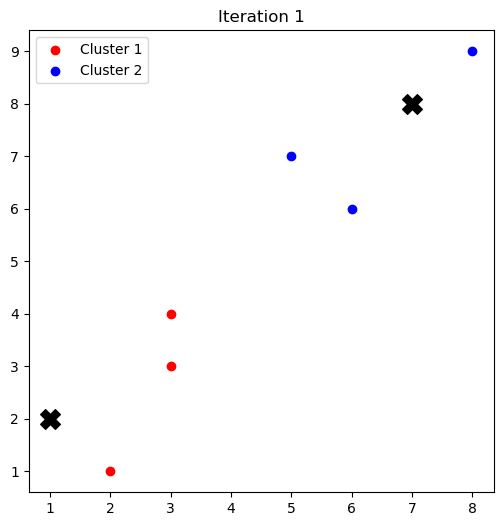

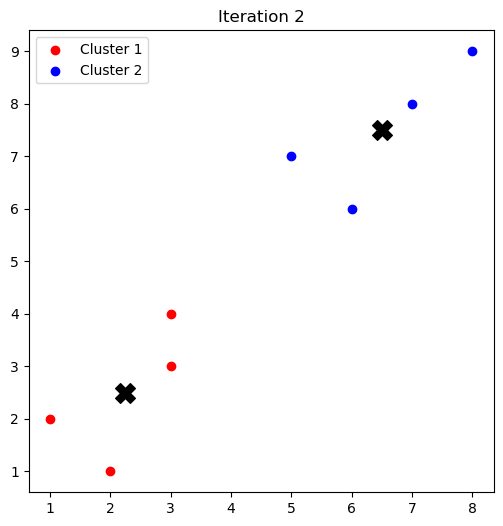

Centroids: [[2.25, 2.5], [6.5, 7.5]]
Clusters: [[[1, 2], [2, 1], [3, 4], [3, 3]], [[5, 7], [8, 9], [7, 8], [6, 6]]]


In [3]:
import random
import math
import matplotlib.pyplot as plt

# --- Euclidean distance function ---
def euclidean_distance(point1, point2):
    distance = 0.0
    for i in range(len(point1)):
        difference = point1[i] - point2[i]
        squared_difference = difference ** 2
        distance += squared_difference
    return math.sqrt(distance)

# --- Centroid calculation ---
def calculate_centroid(points):
    if not points:
        return []
    n_dims = len(points[0])
    sums = [0.0] * n_dims
    for point in points:
        for i in range(n_dims):
            sums[i] += point[i]
    centroid = []
    for i in range(n_dims):
        mean_value = sums[i] / len(points)
        centroid.append(mean_value)
    return centroid

# --- K-means with visualization ---
def kmeans_visual(data, k, max_iterations=100):
    centroids = random.sample(data, k)

    for iteration in range(max_iterations):
        # Step 1: Create empty clusters
        clusters = [[] for _ in range(k)]

        # Step 2: Assign each point
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            closest_centroid_index = distances.index(min(distances))
            clusters[closest_centroid_index].append(point)

        # --- Visualization ---
        colors = ['red', 'blue', 'green', 'purple', 'orange']
        plt.figure(figsize=(6, 6))
        for cluster_index, cluster in enumerate(clusters):
            xs = [p[0] for p in cluster]
            ys = [p[1] for p in cluster]
            plt.scatter(xs, ys, color=colors[cluster_index], label=f"Cluster {cluster_index+1}")
        for centroid in centroids:
            plt.scatter(centroid[0], centroid[1], color='black', marker='X', s=200)
        plt.title(f"Iteration {iteration+1}")
        plt.legend()
        plt.show()

        # Step 3: Calculate new centroids
        new_centroids = [calculate_centroid(cluster) for cluster in clusters]

        # Step 4: Check for convergence
        if new_centroids == centroids:
            break
        centroids = new_centroids

    return centroids, clusters

# --- Example data ---
data = [
    [1, 2], [2, 1], [3, 4], [5, 7],
    [3, 3], [8, 9], [7, 8], [6, 6]
]

final_centroids, final_clusters = kmeans_visual(data, k=2)
print("Centroids:", final_centroids)
print("Clusters:", final_clusters)


In [ ]:
# Linear Regression 
# b = (x.T @ x)^-1 @ x.T @ y
# j = 1/2m * sum((h - y)^2)
# --- IGNORE ---


In [6]:
import numpy as np

def normal_equation(X, y):
    # Add 1s for intercept
    ones = np.ones((X.shape[0], 1))
    X_b = np.hstack((ones, X))  # shape: (n_samples, n_features+1)

    # Calculate beta = (X^T X)^(-1) X^T y
    XT = X_b.T
    XTX = XT.dot(X_b)
    XTX_inv = np.linalg.inv(XTX)
    XTy = XT.dot(y)
    beta = XTX_inv.dot(XTy)
    
    return beta

# Example
X = np.array([[1, 2], [2, 0], [3, 1]])
y = np.array([6, 5, 7])

coeffs = normal_equation(X, y)
print("Intercept:", coeffs[0])
print("Slopes:", coeffs[1:])


Intercept: 2.999999999999986
Slopes: [1. 1.]


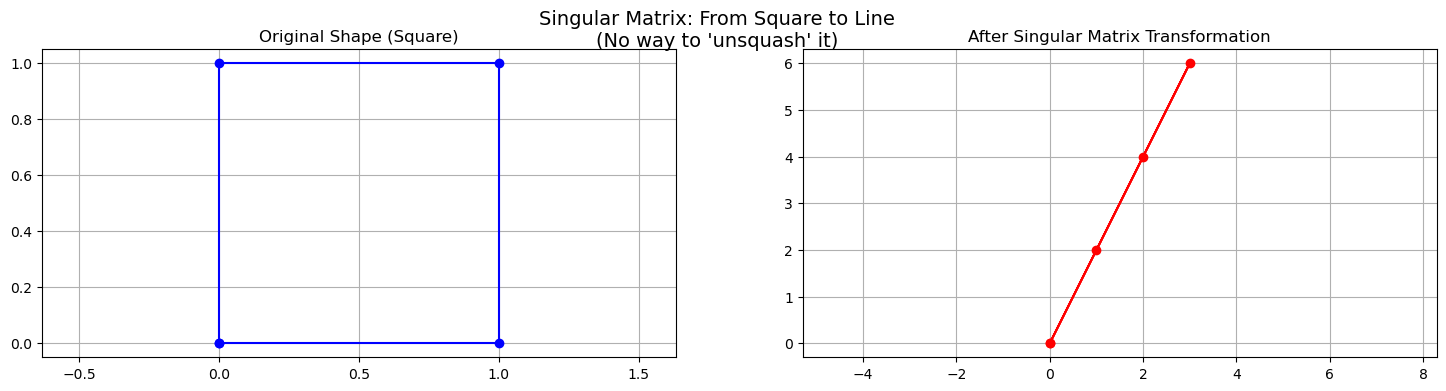

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Original square in 2D
square = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]  # close the shape
])

# Transformation matrix (singular)
A = np.array([
    [1, 2],
    [2, 4]  # second row is multiple of first
])

# Apply transformation
transformed_square = square @ A.T

# Plot original square
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
plt.plot(square[:,0], square[:,1], 'b-o')
plt.title("Original Shape (Square)")
plt.axis('equal')
plt.grid(True)

# Plot transformed "squashed" square
plt.subplot(1,2,2)
plt.plot(transformed_square[:,0], transformed_square[:,1], 'r-o')
plt.title("After Singular Matrix Transformation")
plt.axis('equal')
plt.grid(True)

plt.suptitle("Singular Matrix: From Square to Line\n(No way to 'unsquash' it)", fontsize=14)
plt.show()


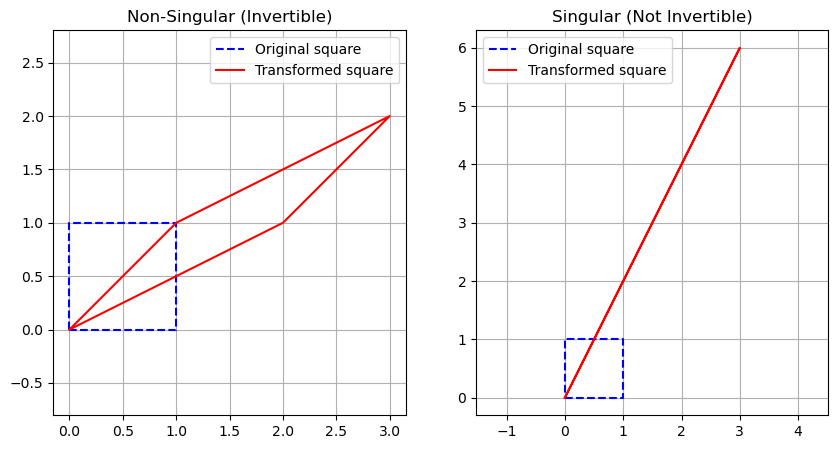

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_transformation(matrix, ax, title):
    # Original square (unit square)
    square = np.array([
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1],
        [0, 0]
    ])

    # Transform square
    transformed = square @ matrix.T

    # Plot original
    ax.plot(square[:, 0], square[:, 1], 'b--', label='Original square')
    # Plot transformed
    ax.plot(transformed[:, 0], transformed[:, 1], 'r-', label='Transformed square')
    ax.set_title(title)
    ax.legend()
    ax.axis('equal')
    ax.grid(True)

# Non-singular matrix example
non_singular_matrix = np.array([
    [2, 1],
    [1, 1]
])

# Singular matrix example
singular_matrix = np.array([
    [1, 2],
    [2, 4]
])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_transformation(non_singular_matrix, axes[0], "Non-Singular (Invertible)")
plot_transformation(singular_matrix, axes[1], "Singular (Not Invertible)")

plt.show()


In [29]:
def generic_gradient_descent(cost_function,gradient_function,initial_params, learning_rate=0.01, max_iterations=10, tolerance=1e-6):
    params = np.array(initial_params,dtype=float)
    cost_history = []
    params_history = []
    grad_history = []
    for i in range(max_iterations):
        cost = cost_function(params)
        cost_history.append(cost)
        
        gradient = gradient_function(params)
        grad_history.append(gradient.copy())
        new_param = params - learning_rate*gradient
        
        params_history.append(new_param.copy())
        
        if np.sum(np.abs(new_param-params))< tolerance:
            print(f"Converged after {i+1} iterations")
            break
        params = new_param
    
    return params, cost_history,grad_history, params_history

In [17]:
def cost_function(x):
    return x**2 - 4*x +4

def grad_function(x):
    return 2*x - 4

In [38]:
grad_function(1.4)

-1.2000000000000002

In [36]:
initial_x = 5
result, cost_history,grad_history ,params_history = generic_gradient_descent(cost_function, grad_function, initial_x, learning_rate=.6, max_iterations=10)

print("Final parameters:", result)
print("Cost history:", cost_history)
print("Gradient history:", grad_history)
print("Parameters history:", params_history)


Final parameters: 2.0000003072
Cost history: [9.0, 0.35999999999999943, 0.01440000000000019, 0.000576000000000132, 2.304000000030726e-05, 9.215999998701818e-07, 3.6863999852698726e-08, 1.4745600296350858e-09, 5.898215249544592e-11, 2.3594459719333827e-12]
Gradient history: [6.0, -1.1999999999999993, 0.2400000000000002, -0.04800000000000004, 0.009599999999999831, -0.0019200000000001438, 0.00038400000000038403, -7.679999999998799e-05, 1.535999999990878e-05, -3.0720000001593917e-06]
Parameters history: [1.4000000000000004, 2.12, 1.976, 2.0048, 1.99904, 2.000192, 1.9999616, 2.00000768, 1.999998464, 2.0000003072]


In [37]:
5*60

300

In [1]:
csv_data = """OrderID,OrderDate,Product,Price,Quantity,CustomerAge
101,2023-01-15,Widget A,"$10.50",5,35
102,2023-01-16,Widget B,"$20.00",2,
103,2023-01-17,,$15.25,3,42
104,2023-01-18,Widget A,"$10.50",-1,28
105,2023-01-19,Widget C,N/A,4,55
106,2023-01-20,widget a,"$10.50",6,35
"""

In [2]:
import pandas as pd
import io
import numpy as np

In [3]:
df = pd.read_csv(io.StringIO(csv_data))

In [11]:
print("--- 1. Initial Data ---")
print(df)
print("\n--- 2. Initial Info ---")
df.info()

--- 1. Initial Data ---
   OrderID   OrderDate   Product   Price  Quantity  CustomerAge
0      101  2023-01-15  Widget A  $10.50         5         35.0
1      102  2023-01-16  Widget B  $20.00         2         35.0
2      103  2023-01-17    Unknow  $15.25         3         42.0
3      104  2023-01-18  Widget A  $10.50        -1         28.0
4      105  2023-01-19  Widget C     NaN         4         55.0
5      106  2023-01-20  widget a  $10.50         6         35.0

--- 2. Initial Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      6 non-null      int64  
 1   OrderDate    6 non-null      object 
 2   Product      6 non-null      object 
 3   Price        5 non-null      object 
 4   Quantity     6 non-null      int64  
 5   CustomerAge  6 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 420.0+ bytes


In [5]:
df.isnull().sum()

OrderID        0
OrderDate      0
Product        1
Price          1
Quantity       0
CustomerAge    1
dtype: int64

In [7]:
median_age = df['CustomerAge'].median()
df['CustomerAge']=df['CustomerAge'].fillna(median_age)

In [9]:
df['Product'] = df['Product'].fillna('Unknow')

In [10]:
df['Price'] = df['Price'].replace('N/A',np.nan)

In [13]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [14]:
print("--- 1. Initial Data ---")
print(df)
print("\n--- 2. Initial Info ---")
df.info()

--- 1. Initial Data ---
   OrderID  OrderDate   Product   Price  Quantity  CustomerAge
0      101 2023-01-15  Widget A  $10.50         5         35.0
1      102 2023-01-16  Widget B  $20.00         2         35.0
2      103 2023-01-17    Unknow  $15.25         3         42.0
3      104 2023-01-18  Widget A  $10.50        -1         28.0
4      105 2023-01-19  Widget C     NaN         4         55.0
5      106 2023-01-20  widget a  $10.50         6         35.0

--- 2. Initial Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      6 non-null      int64         
 1   OrderDate    6 non-null      datetime64[ns]
 2   Product      6 non-null      object        
 3   Price        5 non-null      object        
 4   Quantity     6 non-null      int64         
 5   CustomerAge  6 non-null      float64       
dtypes: datetime64

In [15]:
df['Price'] = df['Price'].str.replace('$',"").astype(float)

In [16]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [17]:
print("--- 1. Initial Data ---")
print(df)
print("\n--- 2. Initial Info ---")
df.info()

--- 1. Initial Data ---
   OrderID  OrderDate   Product  Price  Quantity  CustomerAge
0      101 2023-01-15  Widget A  10.50         5         35.0
1      102 2023-01-16  Widget B  20.00         2         35.0
2      103 2023-01-17    Unknow  15.25         3         42.0
3      104 2023-01-18  Widget A  10.50        -1         28.0
4      105 2023-01-19  Widget C  13.35         4         55.0
5      106 2023-01-20  widget a  10.50         6         35.0

--- 2. Initial Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      6 non-null      int64         
 1   OrderDate    6 non-null      datetime64[ns]
 2   Product      6 non-null      object        
 3   Price        6 non-null      float64       
 4   Quantity     6 non-null      int64         
 5   CustomerAge  6 non-null      float64       
dtypes: datetime64[ns](1)

In [18]:
# handle currupted data/invalid data

median_quantity = df[df['Quantity'] > 0]['Quantity'].median()

In [21]:
df.loc[df['Quantity']<=0,'Quantity'] = median_quantity

In [22]:
# standardize the data
df['Product'] = df['Product'].str.title()

In [24]:
print("--- 1. Initial Data ---")
print(df)

--- 1. Initial Data ---
   OrderID  OrderDate   Product  Price  Quantity  CustomerAge
0      101 2023-01-15  Widget A  10.50         5         35.0
1      102 2023-01-16  Widget B  20.00         2         35.0
2      103 2023-01-17    Unknow  15.25         3         42.0
3      104 2023-01-18  Widget A  10.50         4         28.0
4      105 2023-01-19  Widget C  13.35         4         55.0
5      106 2023-01-20  Widget A  10.50         6         35.0


In [25]:
# feature engineering
df['TotalSale'] = df['Price']* df['Quantity']

In [26]:
df['DayOfWeek'] = df['OrderDate'].dt.day_name()

In [27]:
print("--- 1. Initial Data ---")
print(df)
print("\n--- 2. Initial Info ---")
df.info()

--- 1. Initial Data ---
   OrderID  OrderDate   Product  Price  Quantity  CustomerAge  TotalSale  \
0      101 2023-01-15  Widget A  10.50         5         35.0      52.50   
1      102 2023-01-16  Widget B  20.00         2         35.0      40.00   
2      103 2023-01-17    Unknow  15.25         3         42.0      45.75   
3      104 2023-01-18  Widget A  10.50         4         28.0      42.00   
4      105 2023-01-19  Widget C  13.35         4         55.0      53.40   
5      106 2023-01-20  Widget A  10.50         6         35.0      63.00   

   DayOfWeek  
0     Sunday  
1     Monday  
2    Tuesday  
3  Wednesday  
4   Thursday  
5     Friday  

--- 2. Initial Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      6 non-null      int64         
 1   OrderDate    6 non-null      datetime64[ns]
 2   Product     